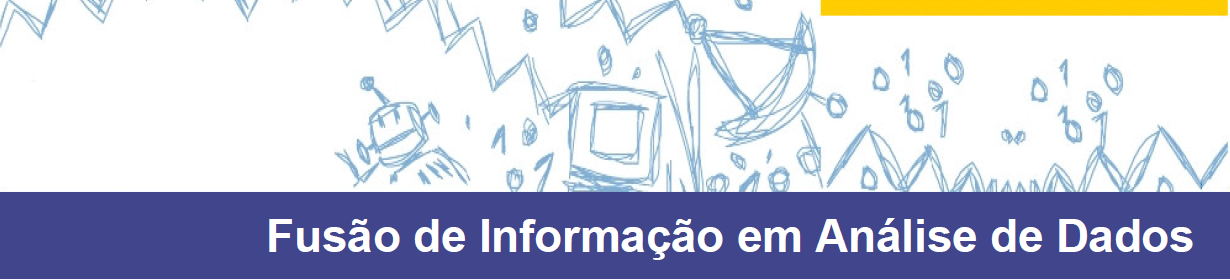
### Ficha Prática nº 1 de FIAD 2022 - Uma Resolução usando Python
Alberto Cardoso e Jorge Henriques © DEI2021/2022

Objetivo: Pretende-se iniciar a análise de dados, efetuando o pré-processamento de uma série temporal e identificando a sua tendência.

**Exercício 1.**
	
Uma série temporal é uma sequência temporalmente ordenada de dados. Antes de iniciar a análise de uma série temporal deve-se proceder à sua preparação através do pré-processamento dos dados que envolve, normalmente, as seguintes operações: 
    
Antes de iniciar a análise da uma série temporal deve-se proceder à sua preparação através do pré-processamento dos dados que envolve, normalmente, as seguintes operações:
- Deteção e regularização do espaçamento dos dados, envolvendo a deteção de dados em falta (por exemplo, identificados pelo valor NaN) e a sua substituição por um valor estimado usando, por exemplo, um método de interpolação ou de extrapolação;
- Deteção e regularização de valores atípicos (*outliers*), envolvendo a sua deteção considerando, por exemplo, o critério |$x_{i}$-μ|>3σ, sendo $x_{i}$ o valor da série no índice *i*, μ a média da série e σ o desvio padrão da série, e a sua substituição por um valor adequado.
Dependendo do outlier ser aditivo ou subtrativo, o valor a usar poderá ser, por exemplo, $x_{i}$=μ+2.5σ no caso aditivo e $x_{i}$=μ-2.5σ no caso subtrativo.
    
De referir que o pré-processamento dos dados é muito importante porque a existência de dados em falta e/ou de *outliers* pode comprometer os procedimentos de análise da série temporal.

Nesta ficha, pretende-se tratar a série temporal que representa a evolução da temperatura média numa dada localização. No caso, considera-se o dataset com os dados de Lisboa de 1980 a 2018. 

Cada amostra da série corresponde a 1 mês, sendo a primeira referente a janeiro de 1980.

**Exercício 1.1** Ler e representar graficamente a série temporal existente no ficheiro de dados "lisbon_temp_fmt.mat" (temperaturas com espaçamento temporal em meses).

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy.signal import detrend

#--- Ler ficheiro com a série temporal
#--- Contém: tempas temperaturas médias
# série temporal
x1 = np.genfromtxt("lisbon_temp_fmt.txt", dtype='float')

N=len(x1) # Comprimento da série temporal
print('N = ',N)
n = np.arange(N) # escala temporal em meses

N =  468


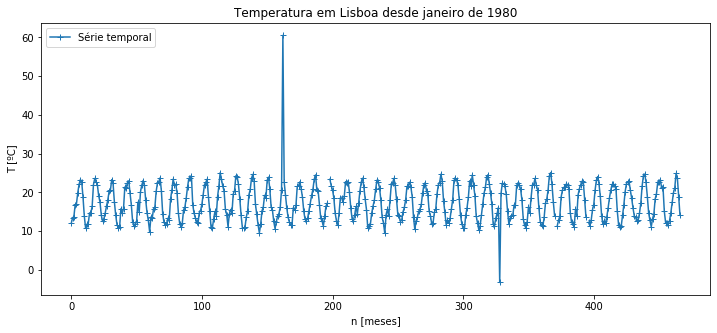

In [2]:
#--- Representação gráfica
plt.figure(figsize=(12,5))
plt.plot(n,x1,'-+',label='Série temporal')
plt.xlabel('n [meses]')
plt.ylabel('T [ºC]')
plt.title('Temperatura em Lisboa desde janeiro de 1980')
plt.legend(loc='upper left')
plt.show()

<strong>Exercício 1.2</strong> Verificar a existência de valores não recolhidos/medidos, identificados com NaN (*Not a Number*). Identifique-os, e substitua cada um desses valores por valores que resultam de um processo de extrapolação e represente graficamente a série temporal modificada, comparando-a com a inicial.
Sugestão: Reconstruir os valores em falta usando extrapolação com o método '*pchip*' (**interp1**).

Há NaN? - True
indNaN =  [197 371 395 467]
x1[indNaN] =  [nan nan nan nan]
x1r[indNaN] =  [17.9  10.42  9.29  9.3 ]


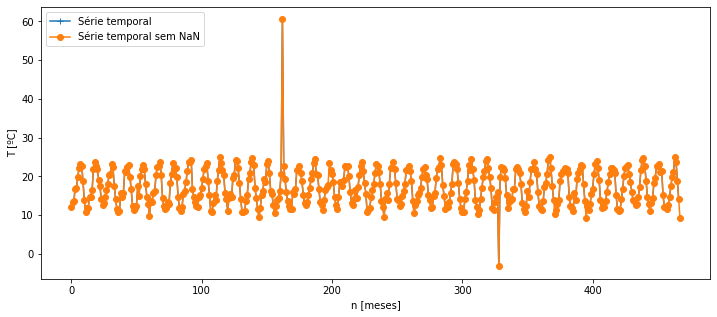

In [3]:
# Ex 1.2
#---Verifica a existência de NaN
haNaN=np.isnan(x1).any() # Há NaN?
print("Há NaN? -", haNaN)

indNaN=np.where(np.isnan(x1))[0] # Índice dos elementos com NaN
print("indNaN = ",indNaN)
print("x1[indNaN] = ",x1[indNaN])
#---Reconstruir as lacunas usando extrapolação
x1r=np.array(x1, copy=True)

if haNaN:
    ind = indNaN
    for k in range(len(ind)):
        nn=n[ind[k]-4:ind[k]] # admitindo que não há NaNs no início
        xx=x1r[ind[k]-4:ind[k]]
        f=interp1d(nn,xx,fill_value='extrapolate')
        x1r[ind[k]]=f(n[ind[k]])
print("x1r[indNaN] = ",x1r[indNaN])

#--- Representação gráfica
plt.figure(figsize=(12,5))
plt.plot(n,x1,'-+',label='Série temporal')
plt.plot(n,x1r,'-o',label='Série temporal sem NaN')
plt.legend(loc='upper left')
plt.ylabel('T [ºC]')
plt.xlabel('n [meses]')
plt.show()

**Exercício 1.3** Determinar os valores da média (**mean**) e do desvio padrão (**std**) da série temporal. Determinar a correlação (**corrcoef**) entre a temperatura na década de 80 e a temperatura na década de 90. Comentar os resultados.

In [4]:
# Ex 1.3
#---Média, desvio padrão e correlação
# - Funções: mean, std e corrcoef
mu1 = x1r.mean()
print("mu1 = ", mu1)
sigma1 = x1r.std()
print("sigma1 = ", sigma1)

# Determinar temperaturas nas décadas de 80 e 90
ix80=0
ix89=10*12-1
ix90=ix89+1
ix99=ix90+10*12-1

temp80=x1r[ix80:ix89+1]
temp90=x1r[ix90:ix99+1]

print('Correlação entre as duas séries temporais sem NaN:')
corr=np.corrcoef(temp80,temp90)
print("corrcoef = ", corr)

mu1 =  17.285149572649573
sigma1 =  4.777814311273789
Correlação entre as duas séries temporais sem NaN:
corrcoef =  [[1.         0.71985507]
 [0.71985507 1.        ]]


    Sendo a correlação entre as duas séries temporais de 0.7199, pode concluir-se que estas são fortemente correlacionadas.

**Exercício 1.4** Verificar a existência de *outliers*. Identifique-os, substitua-os por valores adequados e represente graficamente a série temporal modificada, comparando-a com as anteriores.

Quantos outliers? - 2
indoutl1 =  [162 328]
x1r[indoutl1] =  [60.55 -3.25]


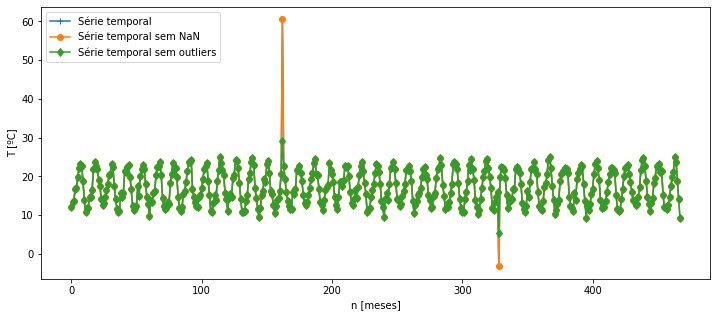

In [5]:
# Ex 1.4
#---Verifica outliers
indoutl1=np.where(abs(x1r - mu1) > 3*sigma1)[0] # Índice dos outliers
nout1 = len(indoutl1) # número de outliers
print("Quantos outliers? -", nout1)
print("indoutl1 = ",indoutl1)
print("x1r[indoutl1] = ",x1[indoutl1])

x1ro=np.array(x1r,copy=True) # Substituição dos outliers
if nout1:
    for k in range(len(indoutl1)):
        if x1ro[indoutl1[k]] > mu1:
            x1ro[indoutl1[k]] = mu1 + 2.5*sigma1
        else:
            x1ro[indoutl1[k]] = mu1 - 2.5*sigma1

#--- Representação gráfica dos resultados
plt.figure(figsize=(12,5))
plt.plot(n,x1,'-+',label='Série temporal')
plt.plot(n,x1r,'-o',label='Série temporal sem NaN')
plt.plot(n,x1ro,'-d',label='Série temporal sem outliers')
plt.legend(loc='upper left')
plt.ylabel('T [ºC]')
plt.xlabel('n [meses]')
plt.show()

**Exercício 2.**
	
Na análise de uma série temporal considera-se, habitualmente, a identificação da tendência, que representa o seu comportamento de longo-prazo e que caracteriza a evolução do nível médio da série.

**Exercício 2.1** Estimar a componente da tendência para a série temporal que resulta do exercício 1, considerando aproximações polinomiais de grau 0 e 1 e usando a função **detrend**. Calcular a série sem a tendência. Representar graficamente a série temporal em bruto, a componente da tendência e a série temporal sem a tendência de grau 0 e de grau 1.

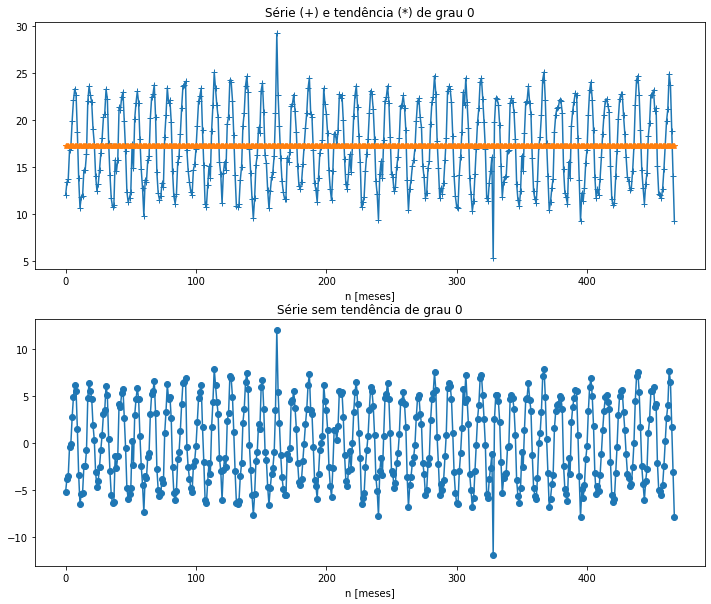

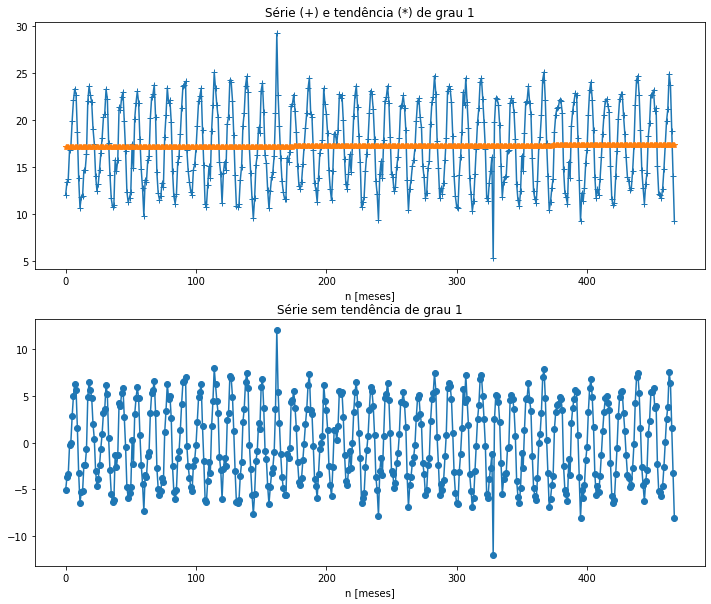

In [6]:
# Ex. 2.1 
#---Estimar tendência paramétrica (polinomial)
# trend de ordem 0
x1ro_t0=detrend(x1ro,type='constant') # média da série
tr1_0=x1ro-x1ro_t0
# trend de ordem 1
x1ro_t1=detrend(x1ro,type='linear') # série sem a tendência
tr1_1=x1ro-x1ro_t1

#--- Representação gráfica dos resultados
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(n,x1ro,'-+',n,tr1_0,'-*')
plt.title('Série (+) e tendência (*) de grau 0')
plt.xlabel('n [meses]')
plt.subplot(2,1,2)
plt.plot(n,x1ro_t0,'-o')
plt.title('Série sem tendência de grau 0')
plt.xlabel('n [meses]')
plt.show()

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(n,x1ro,'-+',n,tr1_1,'-*')
plt.title('Série (+) e tendência (*) de grau 1')
plt.xlabel('n [meses]')
plt.subplot(2,1,2)
plt.plot(n,x1ro_t1,'-o')
plt.title('Série sem tendência de grau 1')
plt.xlabel('n [meses]')
plt.show()

**Exercício 2.2** Estimar a tendência quadrática considerando uma aproximação polinomial de grau 2, usando as funções **polyfit** e **polyval**. Representar graficamente a série temporal em bruto, a componente da tendência e a série temporal sem a tendência quadrática.

 Aproximação polinomial de 2º grau:
p1 =  [-1.67526084e-06  1.31607492e-03  1.70511941e+01]


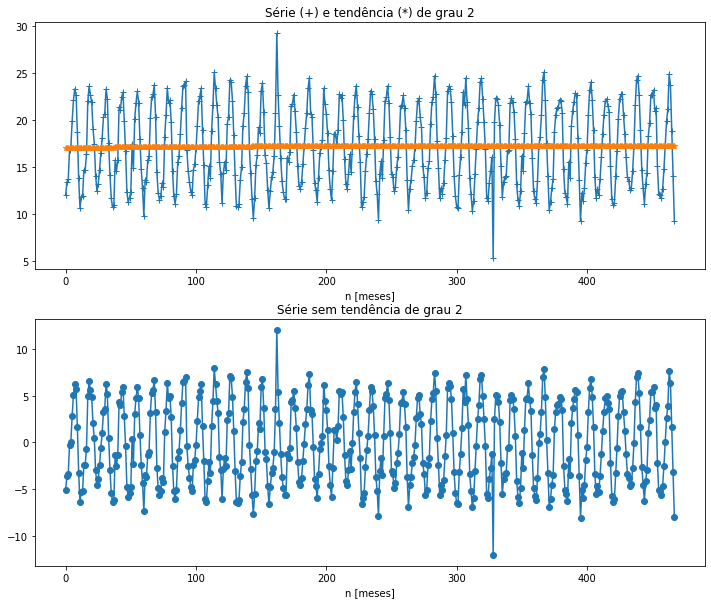

In [7]:
# Ex. 2.2
# trend de ordem 2
print(" Aproximação polinomial de 2º grau:")
p1=np.polyfit(n,x1ro,2) # coeficientes do polinómio
print('p1 = ',p1)
tr1_2=np.polyval(p1,n)  # valores resultantes
x1ro_t2=x1ro-tr1_2

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(n,x1ro,'-+',n,tr1_2,'-*')
plt.title('Série (+) e tendência (*) de grau 2')
plt.xlabel('n [meses]')
plt.subplot(2,1,2)
plt.plot(n,x1ro_t2,'-o')
plt.title('Série sem tendência de grau 2')
plt.xlabel('n [meses]')
plt.show()